<a href="https://colab.research.google.com/github/felipemaiapolo/analise_sentimentos_PMR3508/blob/main/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais com Tensorflow 2 e Keras

#### Disciplina: PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

O objetivo deste notebook é a sua introdução ao pacote Tensorflow para o treinamento de redes neurais. O Tensorflow é uma das principais ferramentas para a implementação de modelos de *Deep Learning* em Python. Suas versões mais recentes (>= 2.0) já integram o Keras, que em versões passadas era utilizado de forma separada. O Keras, por sua vez, é uma ferramenta que permite a implementação de modelos complexos de forma simples e rápida. Por esse motivo, utilizaremos o Keras nessa demonstração.

Nesta demonstração implementaremos uma rede neural MLP com duas camadas ocultas para a classificação de tumores em malignos ou benignos. A base de dados utilizada chama-se "Breast Cancer" e está disponível para download no pacote Scikit-Learn.

Antes de começar, certifique-se de que você tem o Tensorflow instalado em sua máquina e se sua versão é recente (>= 2.0). Se houver a necessidade de instalar o Tensorflow, utilize as seguintes instruções https://www.tensorflow.org/install.



> **Atenção**: 
1. Caso tenha problema em rodar o Tensorflow mesmo após a instalação, tente atualizar o Visual C++ e veja se resolve (https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-c-downloads);
2. Um aluno relatou que teve um bug ao treinar as redes neurais em sua máquina. O bug fazia com que AUC na validação sempre retornasse zero. Se tiver o mesmo bug, consultar https://stackoverflow.com/questions/61706535/keras-validation-loss-and-accuracy-stuck-at-0. 




### Iniciando...

Configurando sementes para reprodutibilidade dos resultados:

In [ ]:
seed=42

import numpy as np
np.random.seed(seed)

import random 
random.seed(seed)

import tensorflow as tf
tf.random.set_seed(seed)

Checando a versão que tenho instalada:

In [ ]:
print(tf.__version__)

2.3.1


Importando pacotes que utilizaremos:

In [ ]:
#Para o uso geral
import pandas as pd
import matplotlib.pyplot as plt

#Importando funcionalidades do Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

#Importando funcionalidades do Tensorflow
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.python.framework import ops
from tensorflow.keras.callbacks import EarlyStopping

Abrindo dados no formato desejado:

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

Destinando parte para teste e parte para treino:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=seed)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


### Um primeiro modelo (*naive model*)

Agora vamos implementar nosso primeiro modelo. Para tal fim, utilizaremos a classe "Sequential", que talvez seja a maneira mais direta de criar redes neurais utilizando o Keras. Literalmente, é só ir colocando as camadas que queremos de forma sequencial, utilizando o método "add" após instanciarmos o modelo:

In [ ]:
#Vamos pegar o número de features utilizadas
n_features = X_train.shape[1]

#Definindo nosso modelo
model_naive = Sequential() #Instanciando um modelo com a classe "Sequential"
model_naive.add(Dense(100, activation='relu', input_shape=(n_features,))) #Colocando a primeira camada oculta com 100 neurônios e função de ativação ReLU
model_naive.add(Dense(100, activation='relu')) #Colocando a segunda camada oculta com 100 neurônios e função de ativação ReLU
model_naive.add(Dense(1, activation='sigmoid')) #Colocando a camada de saída com função de ativação sigmoid

É possível inspecionar o número de pesos referentes a cada uma das camadas utilizando o método "summary":

In [ ]:
model_naive.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________


Agora que já definimos a arquitetura da rede neural, temos que compilar o modelo. Nesse estágio definimos (i) o algoritmo de otimização, (ii) função de perda e (iii) métricas para acompanharmos durante o treinamento:

In [ ]:
model_naive.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

Agora vamos treinar o modelo. Precisamos definir algumas coisas como (i) o número de epochs, (ii) o tamanho dos batches e (iii) a fração de amostras destinadas a validação, a fim de acompanharmos as nossas métricas durante o treinamento:

In [ ]:
history = model_naive.fit(X_train, y_train, 
                          validation_split=.25,
                          epochs=50, 
                          batch_size=96, 
                          shuffle=True, 
                          verbose=1)

Epoch 1/50
4/4 [==============================] - 2s 450ms/step - auc: 0.5069 - loss: 21.9412 - val_auc: 0.5000 - val_loss: 14.8910
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - auc: 0.5100 - loss: 12.7246 - val_auc: 0.8172 - val_loss: 1.3542
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - auc: 0.7019 - loss: 3.8302 - val_auc: 0.7125 - val_loss: 6.8585
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - auc: 0.7768 - loss: 3.2125 - val_auc: 0.8493 - val_loss: 2.4908
Epoch 5/50
4/4 [==============================] - 0s 49ms/step - auc: 0.7798 - loss: 3.3216 - val_auc: 0.8662 - val_loss: 1.1098
Epoch 6/50
4/4 [==============================] - 0s 77ms/step - auc: 0.8471 - loss: 1.4508 - val_auc: 0.8586 - val_loss: 2.0830
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - auc: 0.8872 - loss: 1.1246 - val_auc: 0.9166 - val_loss: 0.6726
Epoch 8/50
4/4 [==============================] - 0s 63ms/step - auc: 0.8813 - loss: 1.3617 -

Também podemos ver o histórico do treinamento plotando gráficos de linha:

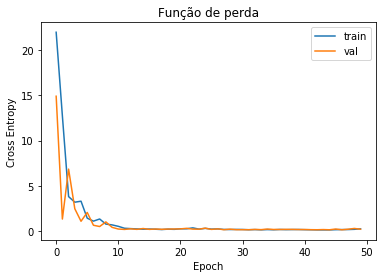

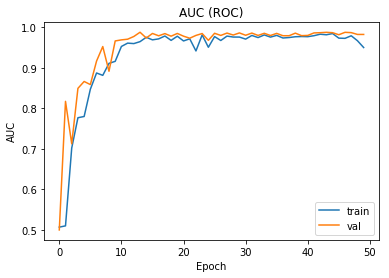

In [ ]:
#Função de perda
plt.title('Função de perda')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

#AUC
plt.title('AUC (ROC)')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.plot(history.history['auc'], label='train')
plt.plot(history.history['val_auc'], label='val')
plt.legend()
plt.show()

### Um segundo modelo (*tuned model*) - utilizando regularização e um holdout set para a escolha de valores para os hiperparâmetros

As estratégias de regularização que utilizaremos neste exemplo são de dois tipos: (i) restrições para valores dos pesos da rede e (ii) early stopping. Referente à primeira estratégia, utilizaremos uma mistura das penalizações dos tipos $l1$ e $l2$ ('Elastic Net'), logo teremos dois hiperparâmetros para 'tunar'. Em relação ao early stopping, vamos fixar que se a métrica AUC (ROC) não melhorar em dez epochs seguidas no conjunto de validação (de acordo com o nível do início das 10 epochs), o treinamento é interrompido - nesse caso não teremos um hiperparâmetro a ser 'tunado' (além do número de epochs).

Além dos hiperparâmetros das estratégias de regularização, temos que escolher o número de neurônios nas duas camadas ocultas, então temos mais dois hiperparâmetros para serem 'tunados'.

Para fazer a escolha dos melhores valores, utilizaremos a abordagem da busca aleatória (Random Search). Vamos então criar uma tabelinha (Pandas DataFrame) com *n_iter* combinações aleatórias para os hiperparâmetros (tirando o número de epochs) e que testaremos a seguir:

In [ ]:
n_iter=100

neurons=[]
reg=[]

#Sorteando valores
for i in range(n_iter):
    h1=random.randrange(25, 100, 1)
    h2=random.randrange(20, h1, 1)
    neurons.append((h1, h2))
    
    l1=random.choice([0, 1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1e-1])
    l2=random.choice([0, 1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1e-1])
    reg.append((l1, l2))
    
#DataFrame
hyper = {'neurons': neurons, 'reg': reg, 'epochs': n_iter*[None], 'auc': n_iter*[None]}
hyper = pd.DataFrame(hyper)
hyper = hyper[['neurons', 'reg', 'epochs', 'auc']]

hyper.head()

,neurons,reg,epochs,auc
0,"(39, 20)","(0.01, 1e-10)",None,None
1,"(56, 34)","(1e-15, 0.01)",None,None
2,"(38, 37)","(0, 0.001)",None,None
3,"(79, 22)","(0, 0)",None,None
4,"(52, 34)","(0.001, 0.001)",None,None


Cada elemento da coluna 'neurons' é uma tupla, que na primeira entrada nos dá o número de neurônios na primeira camada oculta e na segunda entrada nos dá o número de neurônios na segunda camada oculta. Por outro lado, cada elemento da coluna 'reg' é uma tupla, que na primeira entrada nos dá o valor referente à regularização $l1$ e na segunda entrada nos dá o valor referente à regularização $l2$.

Na coluna 'epochs' vamos guardar o número de epochs realizados (por conta do early stopping) e na coluna 'auc' vamos guardar a AUC (ROC) estimada no conjunto de validação.

Abaixo vamos criar uma função que instancia modelos de redes neurais do Keras prontos para serem treinados, o que facilitará na hora de fazer o 'tuning' dos hiperparâmetros:

In [ ]:
def create_model(neurons=(10,10), reg=(.001, .001)):
    
    ops.reset_default_graph() #é importante resetar os grafos das redes neurais já criadas para não tornam o processo muito lento 
    
    #Criando modelo
    model = Sequential()
    model.add(Dense(neurons[0], input_shape=(n_features,), activation='relu', 
                    kernel_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1]), 
                    bias_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1])))
    model.add(Dense(neurons[1], activation='relu', 
                    kernel_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1]), 
                    bias_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1])))
    model.add(Dense(1, activation='sigmoid', 
                    kernel_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1]), 
                    bias_regularizer=regularizers.l1_l2(l1=reg[0], l2=reg[1])))
    
    #Compilando
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    return model

Para cada linha do dataframe 'hyper', vamos treinar um modelo e avaliá-lo no conjunto de validação (holdout set):

In [ ]:
%%time
for j in range(n_iter):
    model = create_model(hyper.loc[j,'neurons'], hyper.loc[j,'reg'])
    
    es = EarlyStopping(monitor='val_auc', patience=10)
    
    history = model.fit(X_train, y_train, 
                        validation_split=.25,
                        epochs=50, 
                        batch_size=96, 
                        shuffle=True, 
                        verbose=False,
                        callbacks=[es]) 
    
    hyper.loc[j,'epochs'] = len(history.history['val_auc'])
    hyper.loc[j,'auc'] = history.history['val_auc'][-1]

    #Progresso
    if (j+1)%int(n_iter/10)==0: print('{:.2f}% concluded.'.format(100*(j+1)/n_iter))
    else: pass

10.00% concluded.
20.00% concluded.
30.00% concluded.
40.00% concluded.
50.00% concluded.
60.00% concluded.
70.00% concluded.
80.00% concluded.
90.00% concluded.
100.00% concluded.
Wall time: 4min 12s


Vamos visualizar as 10 melhores combinações de valores para os hiperparâmetros:

In [ ]:
hyper = hyper.iloc[np.argsort(hyper.loc[:,'auc']),:]
hyper.tail(10)

,neurons,reg,epochs,auc
44,"(50, 24)","(1e-10, 0.1)",11,0.971642
67,"(37, 21)","(1e-05, 0.01)",11,0.971828
79,"(96, 82)","(1e-15, 1e-15)",11,0.973694
25,"(32, 23)","(0.1, 0)",11,0.974627
75,"(86, 47)","(0.1, 1e-05)",11,0.977425
98,"(92, 21)","(0.01, 0.1)",11,0.978172
51,"(41, 24)","(0.01, 1e-05)",11,0.979851
33,"(88, 31)","(0.1, 0)",11,0.981716
29,"(43, 28)","(1e-15, 1e-15)",12,0.984515
30,"(96, 88)","(1e-10, 0.01)",11,0.985261


Vamos treinar nosso modelo final com os melhores valores para os hiperparâmetros e o número ótimo de epochs:

In [ ]:
#Melhores valores
neurons = hyper.iloc[-1,0]
reg = hyper.iloc[-1,1]
epochs = hyper.iloc[-1,2]

#Criando modelo
model_tuned = create_model(neurons, reg)

#Treinando modelo
model_tuned.fit(X_train, y_train, 
                validation_split=0,
                epochs=epochs, 
                batch_size=96, 
                shuffle=True, 
                verbose=False) 

Comparando os dois modelos no conjunto de teste:

In [ ]:
print('AUCs --- (i) MLP (Naive): {:.4f} --- (ii) MLP (Tuned): {:.4f}'.format(roc_auc_score(y_test, model.predict(X_test).squeeze()),
                                                                             roc_auc_score(y_test, model_tuned.predict(X_test).squeeze())))

AUCs --- (i) MLP (Naive): 0.9220 --- (ii) MLP (Tuned): 0.9463
